## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [2]:
import numpy as np
import pandas as pd

#Read Data
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/CNN"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/labels.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/sample_submission.csv.zip', 'r') as z:
  z.extractall()

### Read labels.csv file using pandas

In [8]:
labels=pd.read_csv(project_path+'/labels.csv.zip')
labels.head(2)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo


### Print the count of each category of Dogs given in the dataset

In [9]:
breed_count=labels['breed'].value_counts()
breed_count.head(2)

scottish_deerhound    126
maltese_dog           117
Name: breed, dtype: int64

In [10]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [0]:
# One Hot Endoing of labels
import numpy as np
targets=labels['breed']
one_hot=pd.get_dummies(targets,sparse=True)
one_hot_labels=np.asarray(one_hot)

In [12]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [12]:
img_rows=128
img_cols=128
num_channel=1

from tqdm import tqdm
import cv2
x_train=[]
y_train=[]

for f,img in tqdm(labels.values): # f for format, jpg
    train_img=cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize=cv2.resize(train_img,(img_rows,img_cols))
    x_train.append(train_img_resize)
    y_train.append(img)

100%|██████████| 10222/10222 [00:29<00:00, 343.48it/s]


In [16]:
y_train[2]

'pekinese'

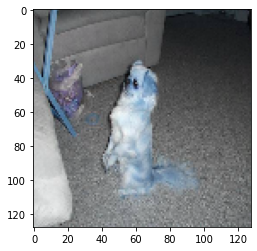

In [15]:
import matplotlib.pyplot as plt
plt.imshow (x_train[2])

In [0]:
x_train1=np.array(x_train)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train1 = x_train1.astype('float32')
x_train1/= 255

In [20]:
x_train1.shape

(10222, 128, 128, 3)

In [21]:
y_train=np.array(y_train)
one_hot_labels.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_train1, one_hot_labels, test_size=0.30,random_state=10)

In [24]:
print (x_train_data.shape)
print (y_train_data.shape)

(7155, 128, 128, 3)
(7155, 120)


In [25]:
print (x_test_data.shape)
print (y_test_data.shape)

(3067, 128, 128, 3)
(3067, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [26]:
test_data=pd.read_csv(project_path+'/sample_submission.csv.zip')
test_data.head(2)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [27]:
test_img=test_data['id']
test_img.head(2)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [35]:
x_test_feature = []
y_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)
    y_test_feature.append(img)

100%|██████████| 10357/10357 [00:30<00:00, 336.14it/s]


Normalize the test data and convert it into 4 dimensions

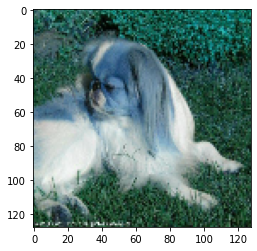

In [37]:
plt.imshow (x_test_feature[0])

In [38]:
test_img[0]

'000621fb3cbb32d8935728e48679680e'

In [47]:
test_img.shape

(10357,)

In [0]:
x_test_feature1=np.array(x_test_feature)
x_test_feature1 = x_test_feature1.astype('float32')
x_test_feature1/= 255

In [48]:
x_test_feature1.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
import pickle

Using TensorFlow backend.


In [0]:
    # Define Model
    model = Sequential()

    # 1st Conv Layer

    model.add(Convolution2D(filters=16, kernel_size=5, padding='same', activation='relu', input_shape=(128,128,3)))
    # 2nd Conv Layer
    model.add(Convolution2D(filters=32, kernel_size=3 , padding='same' , activation='relu'))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(120))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    #early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    #callback_list = [early_stopping]

### Use batch_size = 128 and epochs = 10 and execute the model

In [50]:
model.fit(x_train_data,y_train_data,batch_size=128,nb_epoch=10,validation_data=(x_test_data,y_test_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 14s 2ms/step - loss: 9.3494 - accuracy: 0.0133 - val_loss: 4.7865 - val_accuracy: 0.0124
Epoch 2/10
7155/7155 [==============================] - 6s 906us/step - loss: 4.7654 - accuracy: 0.0189 - val_loss: 4.7787 - val_accuracy: 0.0098
Epoch 3/10
7155/7155 [==============================] - 6s 907us/step - loss: 4.5919 - accuracy: 0.0457 - val_loss: 4.7856 - val_accuracy: 0.0225
Epoch 4/10
7155/7155 [==============================] - 6s 906us/step - loss: 3.8161 - accuracy: 0.1834 - val_loss: 5.0891 - val_accuracy: 0.0209
Epoch 5/10
7155/7155 [==============================] - 6s 908us/step - loss: 2.1418 - accuracy: 0.5238 - val_loss: 5.9940 - val_accuracy: 0.0300
Epoch 6/10
7155/7155 [==============================] - 6s 908us/step - loss: 0.7102 - accuracy: 0.8581 - val_loss: 7.4405 - val_accuracy: 0.0264
Epoch 7/10
7155/7155 [==============================] - 7s 911us/step - loss:

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,# randomly flip images
    )  

# Prepare the generator
datagen.fit(x_train_data)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
  # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

In [58]:
model.fit_generator(datagen.flow(x_train_data, y_train_data,batch_size=128),
                samples_per_epoch=x_train_data.shape[0],
                  nb_epoch=10,
                 validation_data=(x_test_data,y_test_data),callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=55, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
55/55 [==============================] - 26s 472ms/step - loss: 4.8685 - accuracy: 0.0108 - val_loss: 4.7831 - val_accuracy: 0.0082
Epoch 2/10
 1/55 [..............................] - ETA: 5s - loss: 4.7674 - accuracy: 0.0234

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


55/55 [==============================] - 26s 465ms/step - loss: 4.7720 - accuracy: 0.0134 - val_loss: 4.7807 - val_accuracy: 0.0111
Epoch 3/10
55/55 [==============================] - 25s 461ms/step - loss: 4.7679 - accuracy: 0.0120 - val_loss: 4.7785 - val_accuracy: 0.0143
Epoch 4/10
55/55 [==============================] - 25s 461ms/step - loss: 4.7651 - accuracy: 0.0142 - val_loss: 4.7762 - val_accuracy: 0.0150
Epoch 5/10
55/55 [==============================] - 25s 463ms/step - loss: 4.7609 - accuracy: 0.0147 - val_loss: 4.7706 - val_accuracy: 0.0111
Epoch 6/10
55/55 [==============================] - 25s 458ms/step - loss: 4.7559 - accuracy: 0.0172 - val_loss: 4.7669 - val_accuracy: 0.0121
Epoch 7/10
55/55 [==============================] - 25s 457ms/step - loss: 4.7517 - accuracy: 0.0172 - val_loss: 4.7808 - val_accuracy: 0.0121
Epoch 8/10
55/55 [==============================] - 25s 458ms/step - loss: 4.7386 - accuracy: 0.0139 - val_loss: 4.7534 - val_accuracy: 0.0114
Epoch 9/10

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
train_datagen=ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,# randomly flip images
    )  
#train_generator=train_datagen.flow(x_train_data, y_train_data,batch_size=128,target_size=(128, 128),class_mode='multiclass')
#val_generator=

In [0]:
train_generator=train_datagen.flow(x_train_data, y_train_data,batch_size=128)

In [0]:
test_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=False,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=False,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,# randomly flip images
    )  

In [0]:
val_generator=test_datagen.flow(x_test_data, y_test_data,batch_size=128)

In [72]:
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=val_generator,
        validation_steps=50)

Epoch 1/10
100/100 [==============================] - 48s 481ms/step - loss: 4.5563 - accuracy: 0.0303 - val_loss: 4.6492 - val_accuracy: 0.0296
Epoch 2/10
100/100 [==============================] - 47s 467ms/step - loss: 4.5305 - accuracy: 0.0302 - val_loss: 4.5737 - val_accuracy: 0.0271
Epoch 3/10
100/100 [==============================] - 47s 469ms/step - loss: 4.4940 - accuracy: 0.0359 - val_loss: 4.4903 - val_accuracy: 0.0305
Epoch 4/10
100/100 [==============================] - 47s 466ms/step - loss: 4.4790 - accuracy: 0.0390 - val_loss: 4.6421 - val_accuracy: 0.0336
Epoch 5/10
100/100 [==============================] - 46s 463ms/step - loss: 4.4519 - accuracy: 0.0434 - val_loss: 4.6076 - val_accuracy: 0.0304
Epoch 6/10
100/100 [==============================] - 47s 466ms/step - loss: 4.4265 - accuracy: 0.0439 - val_loss: 4.4373 - val_accuracy: 0.0404
Epoch 7/10
100/100 [==============================] - 47s 468ms/step - loss: 4.4329 - accuracy: 0.0428 - val_loss: 4.4582 - val_ac

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [75]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
   # CREATE AN "REAL" MODEL FROM VGG16
# BY COPYING ALL THE LAYERS OF VGG16
new_model = Sequential()
for l in base_model.layers:
    new_model.add(l)

In [102]:
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, None, None, 256)  

In [0]:
    
    new_model.add(Flatten())
    new_model.add(Dense(1024))
    new_model.add(Activation('relu'))

    new_model.add(Dense(256))
    new_model.add(Activation('relu'))

    new_model.add(Dense(120))
    new_model.add(Activation('softmax'))


### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in new_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from keras import applications, optimizers

In [0]:
new_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [110]:
new_model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    samples_per_epoch=x_train_data.shape[0],
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=55, epochs=10, validation_data=<keras.pre..., validation_steps=50)`
  


Epoch 1/10
55/55 [==============================] - 31s 558ms/step - loss: 4.8542 - accuracy: 0.0098 - val_loss: 4.8609 - val_accuracy: 0.0097
Epoch 2/10
55/55 [==============================] - 30s 547ms/step - loss: 4.8527 - accuracy: 0.0091 - val_loss: 4.8296 - val_accuracy: 0.0105
Epoch 3/10
55/55 [==============================] - 30s 542ms/step - loss: 4.8527 - accuracy: 0.0100 - val_loss: 4.8875 - val_accuracy: 0.0088
Epoch 4/10
55/55 [==============================] - 30s 537ms/step - loss: 4.8554 - accuracy: 0.0108 - val_loss: 4.8771 - val_accuracy: 0.0103
Epoch 5/10
55/55 [==============================] - 29s 529ms/step - loss: 4.8502 - accuracy: 0.0100 - val_loss: 4.8649 - val_accuracy: 0.0103
Epoch 6/10
55/55 [==============================] - 29s 519ms/step - loss: 4.8530 - accuracy: 0.0101 - val_loss: 4.8325 - val_accuracy: 0.0091
Epoch 7/10
55/55 [==============================] - 28s 514ms/step - loss: 4.8555 - accuracy: 0.0093 - val_loss: 4.9184 - val_accuracy: 0.0099